Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.
Этапы работы:

    1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
    2. Проведите первичный анализ.
        a.Проверьте данные на пропуски. Удалите в случае обнаружения.
        b.*Нормализуйте один из признаков.
    3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
    4. Обучите модель регрессии на обучающем множестве.
    5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
    6. Обучите дерево решений на обучающем множестве.
        a. Повторите п. 5 для полученной модели.
        b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
    7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
        a. Повторите п. 5 для полученной модели.
    8. Сформулируйте выводы по проделанной работе.
        a. Сравните точность двух моделей.
        b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
# загрузка данных
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
import pandas as pd
X = pd.DataFrame(housing.data, columns=housing.feature_names)
# X.info() # пропусков нет
Y = pd.DataFrame(housing.target,columns=housing.target_names)
# Y.info() # пропусков нет

In [3]:
# разделяю данные, обучаю модель, считаю точность
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)
score_linear = model_linear.score(X_test, y_test)
score_linear

0.5757877060324508

In [4]:
# обучаю модель дерева
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)
score_tree_not_optimized = model_tree.score(X_test, y_test)
score_tree_not_optimized

0.6253526054149888

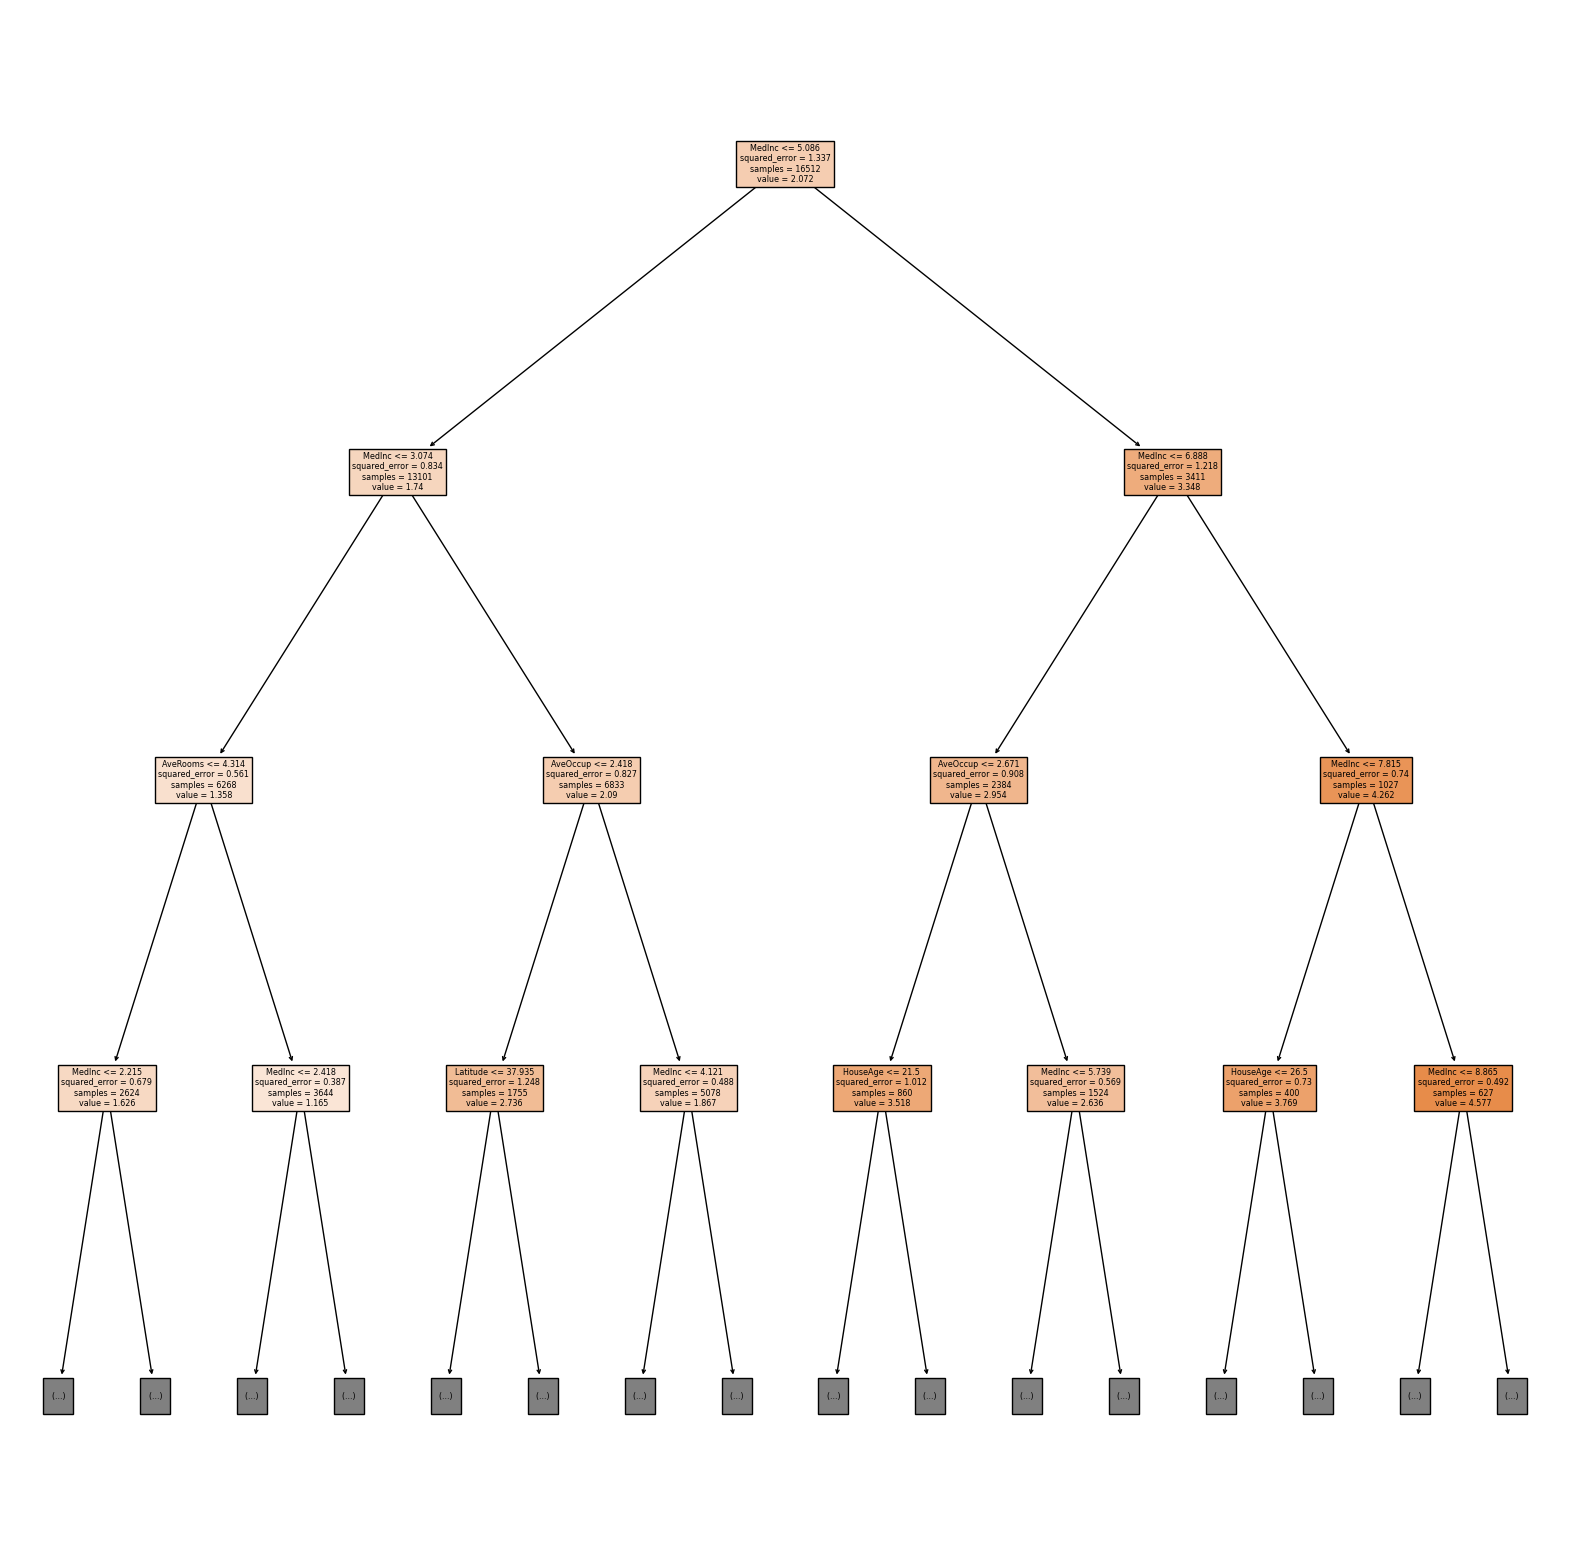

In [5]:
# визуализирую дерево
plt.figure(figsize=(20, 20))
plot_tree(model_tree, max_depth=3, feature_names=X.columns, filled=True) # если визуализировать с большейй глубиной, то дерево делается нечитаемым
plt.show()

In [6]:
# оптимизирую глубину дерева
# функция выдаёт глубину, при которой точность модели на тестовых данных будет максимальной
depth_l = np.linspace(start=1, stop=int(model_tree.get_depth()), num=int(model_tree.get_depth())-1, dtype=int)
depth_l
def depth_optimization(l=depth_l):
    depth_list = []
    for i in l:
        model_tree = DecisionTreeRegressor(max_depth=i)
        model_tree.fit(X_train, y_train)
        depth_list.append(model_tree.score(X_test, y_test))
    
    return depth_list.index(max(depth_list))

depth_optimization()

9

In [7]:
# обновляю модель с оптимальной глубиной
model_tree_o = DecisionTreeRegressor(max_depth=depth_optimization())
model_tree_o.fit(X_train, y_train)
model_tree_o.score(X_test, y_test)
score_tree_optimized = model_tree_o.score(X_test, y_test)
score_tree_optimized

0.6774711844371384

In [8]:
# вывожу результаты
print(f"Точность различных моделей:")
print(f"линейная модель: {score_linear}")
print(f"дерево неоптимизированное: {score_tree_not_optimized}")
print(f"дерево оптимизированное: {score_tree_optimized}")

Точность различных моделей:
линейная модель: 0.5757877060324508
дерево неоптимизированное: 0.6253526054149888
дерево оптимизированное: 0.6774711844371384


Как ни странно, дерево очень неплохо сработало для прогнозирования стоимости домов. Предполагаю, что регрессор можно использовать для задач, где какой-то признак может сильно влиять на целевую переменную. У мен пока недостаточно практики, поэтому сделать обоснованный вывод, насколько дерево хорошо подходит для задачи регресии, я затрудняюсь. Теория говорит, что деревья в основном используются для задач классификации, а для регресии используются достаточно редко.